<a href="https://colab.research.google.com/github/Celes-ovo/Keras/blob/main/4_3%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. 벡터화, 정규화, 누락된 값 다루기, 특성 추출

* 벡터화(Vectorization)

신경망에서 모든 입력과 타깃은 부동 소수 데이터로 이루어진 텐서여야 함.(특정 경우에는 정수)   
어떤 것이든지, 처리할 것을 텐서로 변환하는 작업을 데이터 벡터화라고 함.

> 벡터는 여러 숫자가 순서대로 모여 있는 것으로, 일반적인 일차원 배열이 벡터이다.   
일반적인 이차원 배열인 행렬은 복수의 차원을 가지는 데이터가 다시 여러 개 있는 경우의 데이터를 합쳐서 표기한 것이다.   
삼차원 이상 배열은 텐서(tensor)라고 한다.

* 정규화(값 정규화, Normalization)   
숫자 이미지 분류 : 이미지 데이터를 그레이스케일 인코딩인 0~255 사이의 값으로 정규화   
주택 가격 예측 : 특성들의 범위가 제각각 달랐기에 각 특성을 독립적으로 정규화하여 평균이 0이고 표준편차가 1이 되게 만듦.   

이때 일반적으로 비교적 큰 값이나 균일하지 않은 데이터를 신경망에 주입하는 것은 위험하다.   
→ 업데이트할 그래디언트가 커져 네트워크가 수렴하는 것을 방해함!

#2. 네트워크가 쉽게 학습되려면??

* 작은 값을 취한다. 일반적으로 대부분의 값이 0~1 사이여야 한다.   
* 모든 특성이 대체로 비슷한 범위를 가져야 한다. (균일해야 한다.)      

* 꼭 필수적이지는 않은 염-격한 정규화 방법   
> 각 특성별로 평균이 0이 되도록 정규화한다.   
> 각 특성별로 표준편차가 1이 되도록 정규화한다.

In [ ]:
x -= x.mean(axis = 0)
x /= x.std(axis = 0)

#3. 누락된 값 다루기

* 사전의 정의된 의미 있는 값이 아닐 경우, 0으로 입력해도 괜찮다.   
* 네트워크가 누락된 값이 없는 데이터에서 훈련된 경우? : 누락된 값을 무시하는 법을 알지 못한다.   
→ 그래서, 일부러 누락된 값이 있는 훈련 샘플을 만들어야 한다.

# 4. 특성 공학(Feature engineering)

모델이 데이터를 더 잘 학습할 수 있게 해 주는 작업.   
데이터에 하드코딩된 변환을 적용하여 모델이 수월하게 작업할 수 있게 한다.   

가령, 시계 이미지를 입력 데이터로 하는 모델이 있을 경우   
원본의 2차원 픽셀 데이터에서 더욱 좋은 데이터는 시계바늘들의 좌표,   
더더욱 좋은 데이터는 시계바늘들의 각도 등을 예로 들 수 있음!   

이미지의 동심원의 수, 이미지에 있는 숫자의 높이, 픽셀 값의 히스토그램 등을 쓸 수 있다.  
   
   요즘의 딥 러닝은 혼자서도 잘 하기 때문에 특성 공학이 필요 없지만, 더 간단하고 효율적으로 문제를 풀기 위해 특성 공학 자체는 필요하다.

#5. 과대적합과 과소적합

* 과대적합(Overfitting) : 훈련을 너무 많이 했더니 문제의 답에 너무 익숙해져 버린 것  (훈련 데이터에 특화된 패턴을 학습)   
* 과소적합(Underfitting) : 아직 훈련이 부족한 상태.

과소적합의 경우 모델의 성능이 계속 발전할 수 있는 여지가 있지만,   
과대적합의 경우 그렇지 않다.

과대적합을 방지하기 위한 방법들   
* 더 많은 훈련 데이터를 모은다.   
* 데이터를 더 모으는 것이 불가능할 때 모델이 수용할 수 있는 정보의 양을 조절하거나   
저장할 수 있는 정보에 제약을 가한다 → 규제(regularization)   
* 모델의 크기, 즉 모델에 있는 학습 파라미터의 크기를 줄인다.

#6. 네트워크 크기 축소

###딥러닝의 궁극적인 목적 : 최적화가 아닌 일반화    
모델에 있는 학습 파라미터의 수 : 모델의 용량    

손실을 최소화하기 위해 너무 부족하지도, 충분하지도 않은 적절한 용량의 절충점을 찾아야 함.


적절한 모델 크기를 찾는 방법 : 일단 작은 것부터 시작해, 차례차례 크기를 키워 가며 찾는다.

#7. 가중치 규제 추가

어떤 훈련 데이터와 네트워크 구조가 주어졌을 때 데이터를 설명할 수 있는 가중치 값의 집합은 여러 개가 있다.   
이 중 심플한 모델일수록 복잡한 모델보다 덜 과대적합될 확률이 높다.

가중치 규제 : 네트워크의 복잡도에 제한을 두어 가중치가 작은 값을 가지도록 강제하는 것.   
두 가지 종류가 있다.   
>* L1 규제 : 가중치의 절댓값에 비례하는 비용(penalty)이 추가됨. (가중치의 L1 norm)   
* L2 규제 : 가중치의 제곱에 비례하는 비용(penalty)이 추가됨. (가중치의 L2 norm)   
L2 규제는 신경망에서 가중치 감쇠라고도 부른다.


In [ ]:
# 영화 리뷰 분류 네트워크에 L2 가중치 규제 추가

from keras import regularizers

model = model_Sequential()

model.add(layers.dense(16, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dropout(0.5))
model.add(layers.dense(16, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dropout(0.5))
model.add(layers.dense(1, activation = 'sigmoid'))

#8. 정리

신경망에서 과대적합을 방지하기 위해 가장 널리 사용하는 방법   

* 훈련 데이터를 더 모은다.
* 네트워크의 용량을 감소시킨다.
* 가중치 규제를 추가한다.
* 드롭아웃(dropout)을 추가한다.

은닉층에 드롭아웃(dropout)을 확률  p  로 적용하는 경우, 은닉 유닛들을  p  확률로 제거하는 것이 됩니다.   
이유는, 그 확률을 이용해서 출력을 0으로 설정하기 때문입니다.

#9. 보편적인 머신 러닝 작업 흐름

1. 주어진 문제를 정의한다.   
2. 입력과 출력이 무엇인지를 정의한다.(★)   
3. 가설을 세운다.   
> 주어진 입력으로 출력을 예측할 수 있다.
가용한 데이터에 입력과 츨력 사이의 관계를 학습하는 데 충분한 정보가 있다.   
이때 검증이 중요함.

4. 성공 지표 선택 : 정확도, ROC AUC   

accuracy(정확도) : 전체 중에 맞은 것   
ROC curve & AUC(Area under the curve)


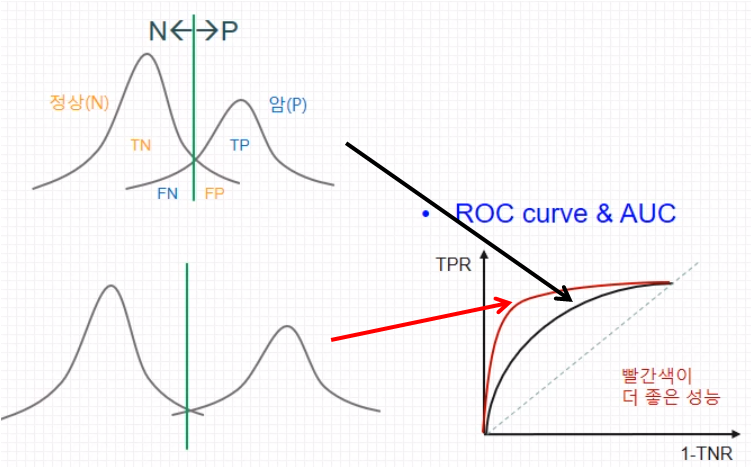

5. 평가 방법 선택 : 현재의 진행 상황을 평가할 방법 정하기

* 흔히 잘 알려진 3가지 평가 방법

홀드아웃 검증 세트 분리 : 데이터가 풍부할 때 사용   
K-겹 교차 검증 : 홀드아웃 검증을 사용하기에 샘플의 수가 너무 적을 때   
반복 K-겹 교차 검증 : 데이터가 적고 매우 정확한 모델 평가가 필요할 때   




대부분 첫 번째 걸로 충분

6. 데이터 준비(머신 러닝 모델에 주입할 데이터를 구성한다.)

데이터 : 텐서로 구성됨   
텐서에 있는 값은 일반적으로 [-1, 1]이나 [0, 1] 범위이다.    
특성이나 범위가 제각각일 경우 정규화(normalization)해야 한다.   
데이터가 적을 때는 특히 특성 공학을 수행할 수 있다.

7. 기본보다 나은 모델 훈련하기

목표 : 통계적 검정력(statistical power)을 달성하는 것   
즉 아주 단순한 모델보다 나은 수준의 작은 모델을 개발한다. (?)   
   
   세 가지 요소를 고려한다.
   1. 마지막 층의 활성화 함수 : 네트워크 출력에 필요한 제한을 가함.   
   2. 손실 함수 : 풀려고 하는 문제의 종류에 적합헤야 함.   
   3. 최적화 설정 : 어떤 옵티마이저를 사용하는지, 학습률은 얼마인지,

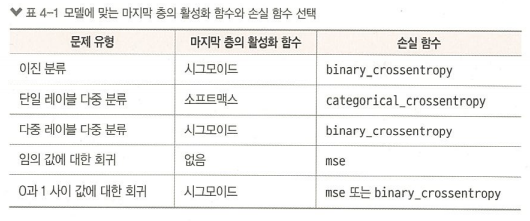

8. 몸집 키우기 : 과대적합 모델 구축

모델이 충분히 성능을 내는가?   
과소적합과 과대적합 사이에 위치한 모델을 찾아야 함. → 과대적합된 모델을 만든다.   

* 층을 추가한다.
* 층의 크기를 키운다.
* 더 많은 epoch 동안 훈련한다.   
   
   이후 훈련 손실과 검증 손실을 모니터링하면서 모델 성능이 감소하기 시작하는 시점이 오면, 그 때가 과대적합이다.

9. 모델 규제와 하이퍼파라미터 튜닝

테스트 데이터를 사용하지 않은 채   
반복적으로 모델을 수정하고, 훈련하고, 검증 데이터에서 평가한다.   
다시 수정하고 가능한 좋은 모델을 얻을 때까지 반복한다.

* 드롭아웃을 추가한다.
* 층을 추가하거나 제거해서 다른 구조를 시도해 본다.
* 최적의 설정을 찾기 위해 하이퍼파라미터를 바꾸어 시도해 본다.   
(층의 유닛 수와 옵티마이저의 학습률 등)
* 특성 공학을 시도해 본다.


   
   이때 검증 과정에서 얻은 피드백을 사용하여 모델을 튜닝할 때마다 검증 과정에 대한 정보를 모델에 누설하게 된다.   
   → 많이 반복하면 과대적합이 된다.

10. 마지막

만족할 만한 모델 설정을 얻은 경우, 가용한 모든 데이터를 활용해서 제품에 투입할 최종 모델을 훈련시킨다.   
그리고 마지막에 딱 한 번 테스트 세트에서 평가한다.